<a href="https://colab.research.google.com/github/josepefg/kaggle/blob/master/Taxa_Suicidio_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.linkedin.com/in/josepegerent"> <img border="0" alt="Linkedin" src="https://img.shields.io/badge/Autor-josepefg-red.svg"> </a>
# **Análise da taxa de suicídios no Brasil**  


# **Obtenção dos dados**  
Os dados foram obtidos no site do Kaggle: [Suicide Rates Overview 1985 to 2016
](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

In [76]:
# importar os pacotes necessários
import warnings
warnings.filterwarnings("ignore", category=Warning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("white")
# plt.figure(figsize=(12,8))

%matplotlib inline
# %matplotlib qt

In [2]:
# importar o arquivo csv com as taxas de suicidio
df = pd.read_csv('https://raw.githubusercontent.com/josepefg/kaggle/master/data/suicide_rate/suicide_rate_overview.csv')

# **Análise dos dados** 
Entender a estrutura e a descrição dos dados.

**Colunas**  

* **country:** País
* **year:** Ano de registro
* **sex:** Sexo da pessoa
* **age group:** Faixa etária
* **count of suicides:** Número de suidídios
* **population:** População
* **suicide rate:** Taxa de suicídio
* **country-year:** Chave composta por País+Ano
* **HDI for year:** Índice de Desenvolvimento Humano do ano
* **gdpforyear:** Produto Interno Bruto do ano
* **gdppercapita:** Produto Interno Bruto per capita
* **generation:** Geração baseado no nascimento  

Antes de iniciar a análise vamos ver algumas linhas do dataset.

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Quais as dimensões do dataset?

In [4]:
print("Linhas: {} \nColunas: {} ".format(df.shape[0], df.shape[1]))

Linhas: 27820 
Colunas: 12 


## Quais os tipos das colunas?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


## Qual a porcentagem de valores ausentes de cada coluna?

In [6]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).map('{:.2%}'.format)

HDI for year          69.94%
generation             0.00%
gdp_per_capita ($)     0.00%
 gdp_for_year ($)      0.00%
country-year           0.00%
suicides/100k pop      0.00%
population             0.00%
suicides_no            0.00%
age                    0.00%
sex                    0.00%
year                   0.00%
country                0.00%
dtype: object

### Qual a porcentagem de valores ausentes para o Brasil?

In [7]:
dfb = df[df.country == 'Brazil']
(dfb.isnull().sum() / dfb.shape[0]).sort_values(ascending=False).map('{:.2%}'.format)

HDI for year          67.74%
generation             0.00%
gdp_per_capita ($)     0.00%
 gdp_for_year ($)      0.00%
country-year           0.00%
suicides/100k pop      0.00%
population             0.00%
suicides_no            0.00%
age                    0.00%
sex                    0.00%
year                   0.00%
country                0.00%
dtype: object

In [8]:
# dfb

Devido ao alto valor de falta de dados de HDI não iremos utilizar essa coluna em nossa análise.

## Como estão distribuídas as variáveis?

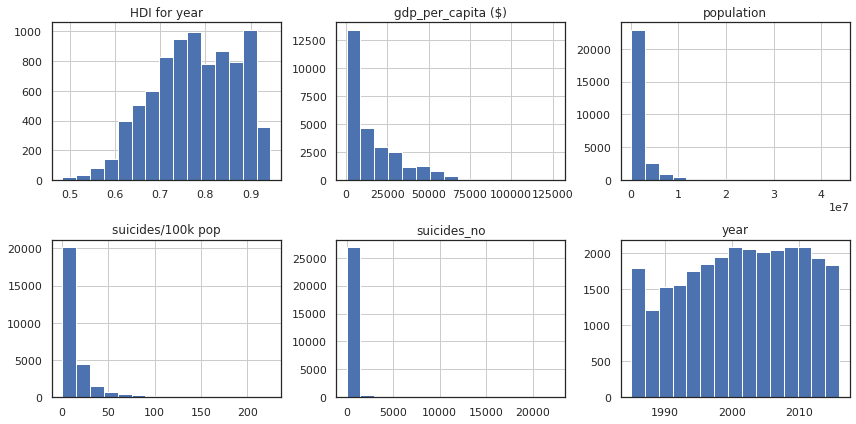

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(12,6), layout=(2,3))
plt.tight_layout()

## Resumo estatístico

In [10]:
# resumo estatístico dos dados numéricos
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [11]:
# resumo estatístico dos dados categóricos
df.describe(include=['O'])

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Austria,female,55-74 years,Canada1993,"22,235,929,043",Generation X
freq,382,13910,4642,12,12,6408


## Taxas de suicídio por país 

In [12]:
anos = df.year.unique()
taxa_paises = df.groupby(['country', 'year']).agg({'suicides/100k pop': ['mean']}).sort_values(('suicides/100k pop', 'mean'), ascending=False).reset_index()
taxa_paises.columns = taxa_paises.columns.droplevel(0)
taxa_paises.columns = ['country', 'year', 'mean']
# print(taxa_paises.head())

taxa_total = df.groupby(['country']).agg({'suicides/100k pop': ['mean']}).sort_values(('suicides/100k pop', 'mean'), ascending=False).reset_index()
taxa_total.columns = taxa_total.columns.droplevel(0)
taxa_total.columns = ['country', 'mean']
# print(taxa_total.head())

taxa_mundial = df.groupby(['year']).agg({'suicides/100k pop': ['mean']}).sort_values(('year'), ascending=False).reset_index()
taxa_mundial.columns = taxa_mundial.columns.droplevel(0)
taxa_mundial.columns = ['year', 'mean']
taxa_mundial['country'] = 'Mundial'
# print(taxa_mundial.tail(20))

# df_clean.groupby(['neighbourhood']).agg({'price': ['mean', 'count']}).sort_values(('price', 'mean'), ascending=False)

In [13]:
taxa_brasil = taxa_paises[taxa_paises['country'] == 'Brazil']

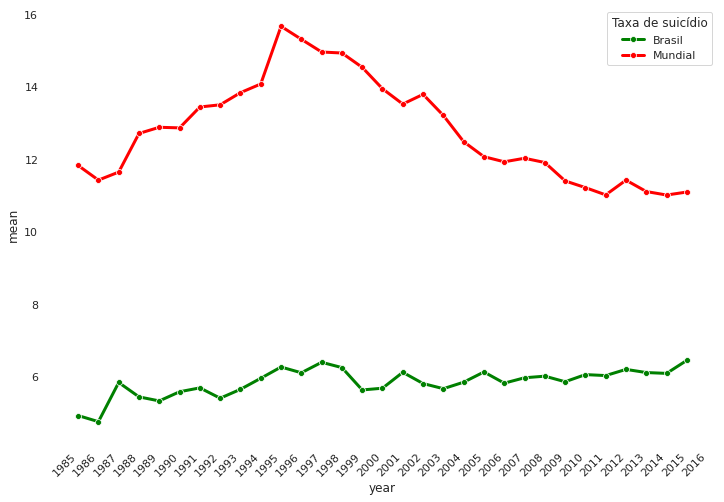

In [14]:
# gráfico comparativo entre a taxa do Brasil e do Mundo
plt.figure(figsize=(12,8))

ax = sns.lineplot(x='year', y='mean', label='Brasil', color='green', linewidth=3, data=taxa_brasil, marker='o')
ax.set(xticks=anos)
ax = sns.lineplot(x='year', y='mean', data=taxa_mundial[taxa_mundial.year < 2016], color='red', label='Mundial', linewidth=3, marker='o')
ax.set_xticklabels(list(map(int, ax.get_xticks())), rotation=45, horizontalalignment='right')

sns.despine(top=True, right=True, left=True, bottom=True)

plt.legend(title="Taxa de suicídio")
plt.show()

In [15]:
taxa_brasil_idade = dfb.groupby(['country', 'year', 'age']).agg({'suicides/100k pop': ['mean']}).sort_values(('suicides/100k pop', 'mean'), ascending=False).reset_index()
taxa_brasil_idade.columns = taxa_brasil_idade.columns.droplevel(0)
taxa_brasil_idade.columns = ['country', 'year', 'age', 'mean']
# taxa_brasil_idade.sort_values(['year', 'age'])

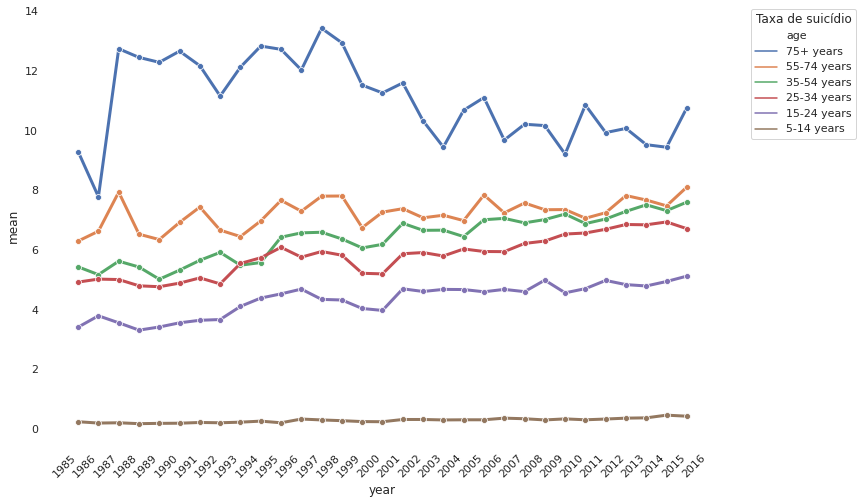

In [16]:
# gráfico comparativo entre faixas de idade
plt.figure(figsize=(12,8))

ax = sns.lineplot(x='year', y='mean', hue='age', linewidth=3, data=taxa_brasil_idade, marker='o')
ax.set(xticks=anos)
ax.set_xticklabels(list(map(int, ax.get_xticks())), rotation=45, horizontalalignment='right')

sns.despine(top=True, right=True, left=True, bottom=True)

plt.legend(title='Taxa de suicídio', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [17]:
taxa_brasil_sexo = dfb.groupby(['country', 'year', 'sex']).agg({'suicides/100k pop': ['mean']}).sort_values(('suicides/100k pop', 'mean'), ascending=False).reset_index()
taxa_brasil_sexo.columns = taxa_brasil_sexo.columns.droplevel(0)
taxa_brasil_sexo.columns = ['country', 'year', 'sex', 'mean']
# taxa_brasil_sexo.sort_values(['year', 'sex'])

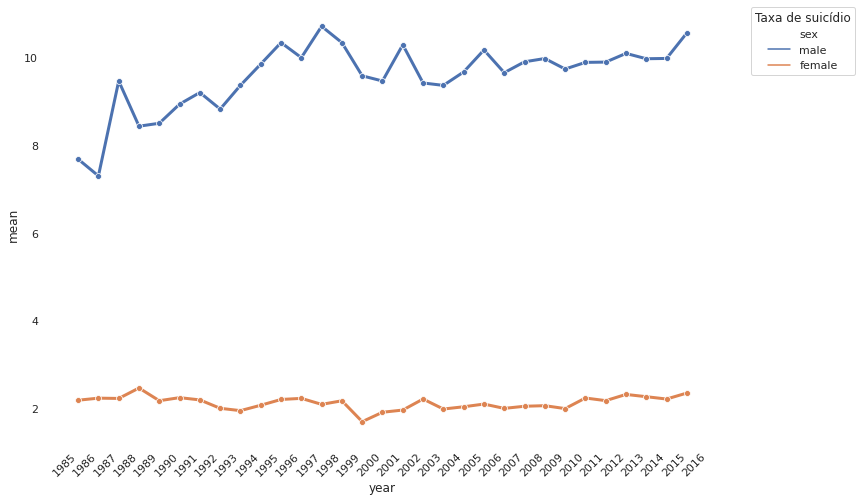

In [18]:
# gráfico comparativo entre faixas de idade
plt.figure(figsize=(12,8))

ax = sns.lineplot(x='year', y='mean', hue='sex', linewidth=3, data=taxa_brasil_sexo, marker='o')
ax.set(xticks=anos)
ax.set_xticklabels(list(map(int, ax.get_xticks())), rotation=45, horizontalalignment='right')

sns.despine(top=True, right=True, left=True, bottom=True)

plt.legend(title='Taxa de suicídio', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [19]:
taxa_brasil_gdp_capita = dfb.groupby(['country', 'year', 'gdp_per_capita ($)']).agg({'suicides/100k pop': ['mean']}).sort_values(('suicides/100k pop', 'mean'), ascending=False).reset_index()
taxa_brasil_gdp_capita.columns = taxa_brasil_gdp_capita.columns.droplevel(0)
taxa_brasil_gdp_capita.columns = ['country', 'year', 'gdp_per_capita ($)', 'mean']
# taxa_brasil_gdp_capita.sort_values(['year', 'gdp_per_capita ($)'])

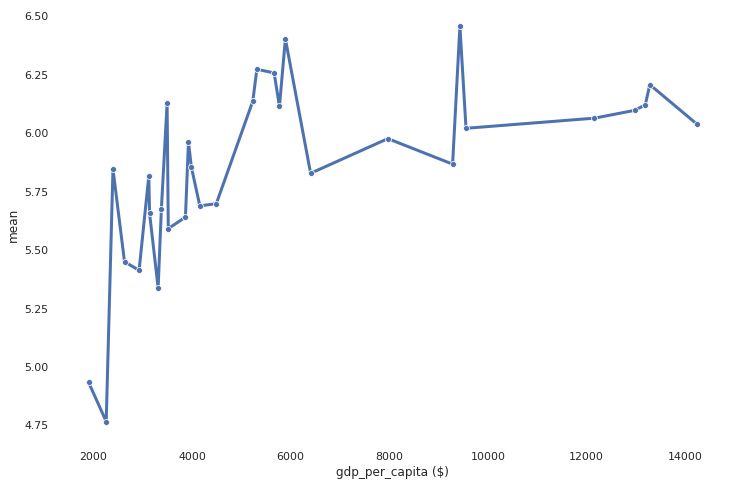

In [20]:
# gráfico comparativo entre pib per capita
plt.figure(figsize=(12,8))

ax = sns.lineplot(x='gdp_per_capita ($)', y='mean', linewidth=3, data=taxa_brasil_gdp_capita, marker='o')
# ax.set(xticks=taxa_brasil_gdp_capita['gdp_per_capita ($)'])
# ax.set_xticklabels(list(map(int, ax.get_xticks())), rotation=45, horizontalalignment='right')

sns.despine(top=True, right=True, left=True, bottom=True)

# plt.legend(title='Taxa de suicídio', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

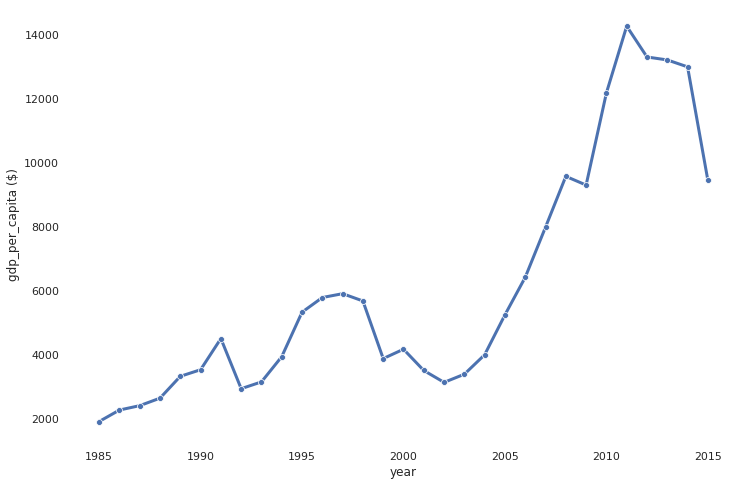

In [21]:
# gráfico comparativo entre pib per capita
plt.figure(figsize=(12,8))

ax = sns.lineplot(x='year', y='gdp_per_capita ($)', linewidth=3, data=taxa_brasil_gdp_capita, marker='o')
# ax.set(xticks=taxa_brasil_gdp_capita['gdp_per_capita ($)'])
# ax.set_xticklabels(list(map(int, ax.get_xticks())), rotation=45, horizontalalignment='right')

sns.despine(top=True, right=True, left=True, bottom=True)

# plt.legend(title='Taxa de suicídio', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

<Figure size 864x576 with 0 Axes>

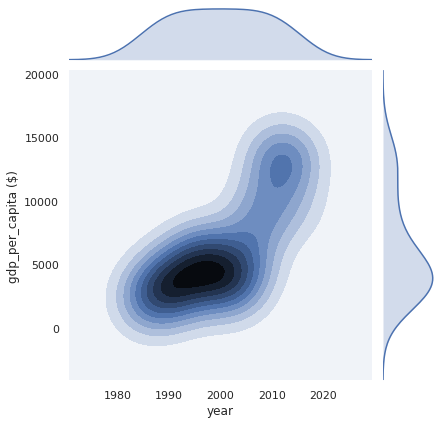

In [22]:
# JOINT PLOT
plt.figure(figsize=(12,8))

sns.jointplot(x = 'year', y = 'gdp_per_capita ($)', kind='kde',data=taxa_brasil_gdp_capita)

sns.despine(top=True, right=True, left=True, bottom=True)

plt.show()

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [24]:
gdppc = taxa_brasil_gdp_capita['gdp_per_capita ($)']
gdpm = taxa_brasil_gdp_capita['mean']
# print(len(gdppc),len(taxa_brasil_gdp_capita.year),len(gdpm))

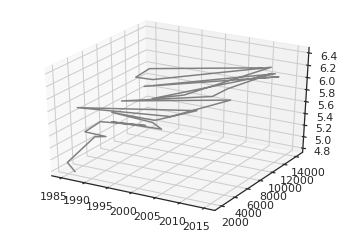

In [25]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot3D(Y=gdppc, X=taxa_brasil_gdp_capita.year, Z=gdpm)
ax.plot3D(taxa_brasil_gdp_capita.year, gdppc, gdpm, 'gray')
plt.show()

In [26]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(x=taxa_brasil_gdp_capita.year, y=gdppc, z=gdpm)
fig.show()

In [55]:
taxa_brasil_idade_tot = dfb.groupby(['country', 'age', 'sex']).agg({'suicides/100k pop': ['mean']}).sort_values(('suicides/100k pop', 'mean'), ascending=False).reset_index()
taxa_brasil_idade_tot.columns = taxa_brasil_idade_tot.columns.droplevel(0)
taxa_brasil_idade_tot.columns = ['country', 'age', 'sex', 'mean']
# taxa_brasil_idade_tot.sort_values(['mean'])

In [56]:
# taxa_brasil_idade_tot['age'].unique()

In [57]:
ages = [taxa_brasil_idade_tot['age'].unique()[5], taxa_brasil_idade_tot['age'].unique()[4], taxa_brasil_idade_tot['age'].unique()[3], taxa_brasil_idade_tot['age'].unique()[2], taxa_brasil_idade_tot['age'].unique()[1], taxa_brasil_idade_tot['age'].unique()[0]]
# ages

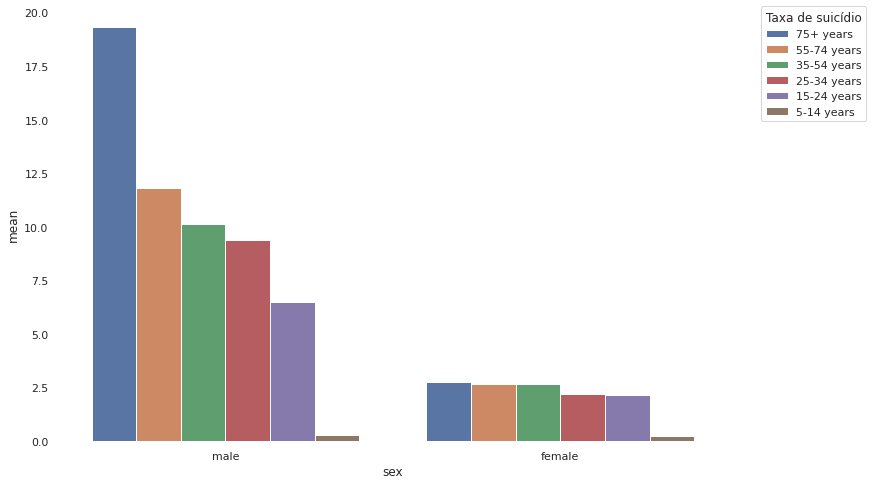

In [58]:
# gráfico comparativo entre faixas de idade
plt.figure(figsize=(12,8))

ax = sns.barplot(x='sex', y='mean', hue='age', data=taxa_brasil_idade_tot)
# ax.set(xticks=ages.text())
# ax.set_xticklabels(list(map(int, ax.get_xticks())), rotation=45, horizontalalignment='right')

sns.despine(top=True, right=True, left=True, bottom=True)

plt.legend(title='Taxa de suicídio', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [99]:
taxa_brasil_idade_tot.at[(10, 'age')] = '05-14 years'
taxa_brasil_idade_tot.at[(11, 'age')] = '05-14 years'

In [100]:
# taxa_brasil_idade_tot

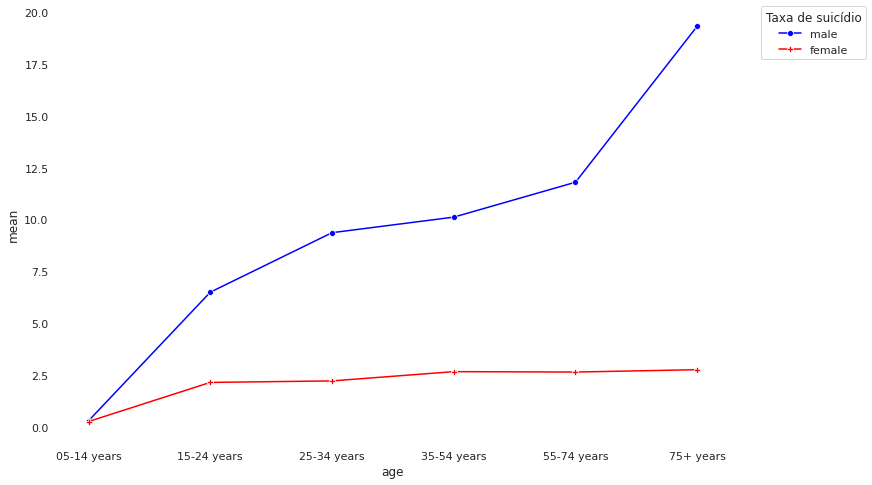

In [101]:
# gráfico comparativo entre faixas de idade
plt.figure(figsize=(12,8))


ax = sns.lineplot(label = 'male', x='age', y='mean', color='blue', data=taxa_brasil_idade_tot[taxa_brasil_idade_tot.sex=='male'], marker="o")
ax = sns.lineplot(label = 'female', x='age', y='mean', color='red', data=taxa_brasil_idade_tot[taxa_brasil_idade_tot.sex=='female'], marker="P")

# plt.bar([i+0.25*width for i in indices], lowPower, 
#         width=0.5*width, color='r', alpha=0.5, label='Min Power in mW')

# ax.set(xticks=ages)
# ax.set_xticklabels(list(map(int, ax.get_xticks())), rotation=45, horizontalalignment='right')

sns.despine(top=True, right=True, left=True, bottom=True)

# ax.set_xticks(range(len(ages)))
# ax.set_xticklabels(ages)

plt.legend(title='Taxa de suicídio', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()